# Imports

In [ ]:
import seaborn as sb
import pandas as pd
import os
import ast
from matplotlib import pyplot as plt
import numpy as np

sb.set(font_scale=2)
sb.set_style("white")

# Load data

In [ ]:
a = pd.read_csv('../csv/fig4a_imagepainting.csv')
b = pd.read_csv('../csv/fig4b_imagepainting_agentpixels.csv')
c = pd.read_csv('../csv/fig4c_imagepainting_overlap.csv')

# Plot data

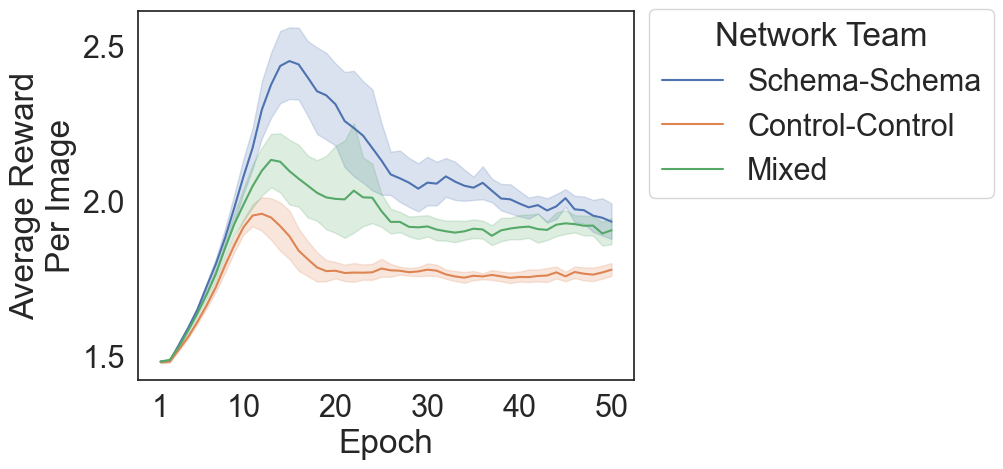

In [ ]:
df_list=[]

for kind in ['Schema','Control','Mixed']:

    lit_list = []

    for idx,g in a.iterrows():

        lit = ast.literal_eval(g[kind])
        lit_list.append([lit])

    df = pd.DataFrame(np.array(lit_list)[:,0,:]).T
    df['Epoch']=range(1,51)
    df_melted = df.melt(id_vars='Epoch', var_name='Subject', value_name='Reward')
    df_melted['Network Team']=kind


    df_list.append(df_melted)

full_df = pd.concat(df_list)
full_df.loc[full_df['Network Team']=='Schema','Network Team']='Schema-Schema'
full_df.loc[full_df['Network Team']=='Control','Network Team']='Control-Control'

ax = sb.lineplot(data=full_df, x='Epoch', y='Reward', hue='Network Team')
sb.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.045))

plt.yticks([1.5, 2, 2.5])
plt.xticks([1, 10, 20, 30, 40, 50])
plt.ylabel('Average Reward\nPer Image')

In [ ]:
b.head(n=2)

,Unnamed: 0,Schema0,Schema1,Control0,Control1,Mixed-Schema,Mixed-Control
0,0,"[160.7448272705078, 160.2845001220703, 158.963...","[160.9461669921875, 161.81967163085938, 160.58...","[161.16766357421875, 161.41549682617188, 159.8...","[161.11666870117188, 160.9286651611328, 160.38...","[160.75900268554688, 161.16915893554688, 160.0...","[162.1913299560547, 161.70333862304688, 160.56..."
1,1,"[160.4651641845703, 160.94482421875, 160.51499...","[160.71316528320312, 160.3874969482422, 158.18...","[161.17649841308594, 160.74749755859375, 158.3...","[161.586669921875, 161.92416381835938, 161.492...","[160.3628387451172, 159.91116333007812, 157.97...","[160.84799194335938, 160.91017150878906, 160.0..."


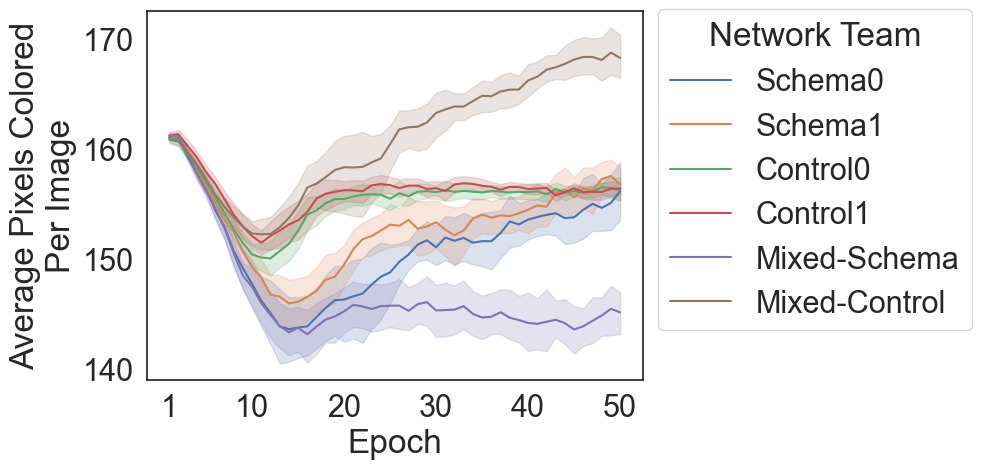

In [ ]:
df_list=[]

for kind in list(b.columns[1:]):

    lit_list = []

    for idx,g in b.iterrows():

        lit = ast.literal_eval(g[kind])
        lit_list.append([lit])

    df = pd.DataFrame(np.array(lit_list)[:,0,:]).T
    df['Epoch']=range(1,51)
    df_melted = df.melt(id_vars='Epoch', var_name='Subject', value_name='Pixels')
    df_melted['Network Team']=kind


    df_list.append(df_melted)

full_df = pd.concat(df_list)
full_df.loc[full_df['Network Team']=='Schema','Network Team']='Schema-Schema'
full_df.loc[full_df['Network Team']=='Control','Network Team']='Control-Control'

ax = sb.lineplot(data=full_df, x='Epoch', y='Pixels', hue='Network Team')
sb.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.045))

plt.xticks([1, 10, 20, 30, 40, 50])
plt.ylabel('Average Pixels Colored\nPer Image')

In [ ]:
c.head(n=3)

,Unnamed: 0,Schema,Control,Mixed
0,0,"[63.621334075927734, 64.07516479492188, 63.110...","[64.09283447265625, 64.09866333007812, 63.4981...","[64.62016296386719, 64.67949676513672, 63.9860..."
1,1,"[63.60566711425781, 63.220001220703125, 62.172...","[64.38216400146484, 64.14683532714844, 63.2775...","[63.46366500854492, 62.9658317565918, 61.68383..."
2,2,"[63.93466567993164, 64.04283142089844, 62.9808...","[64.13133239746094, 63.597999572753906, 63.143...","[63.68033218383789, 63.69366455078125, 62.8161..."


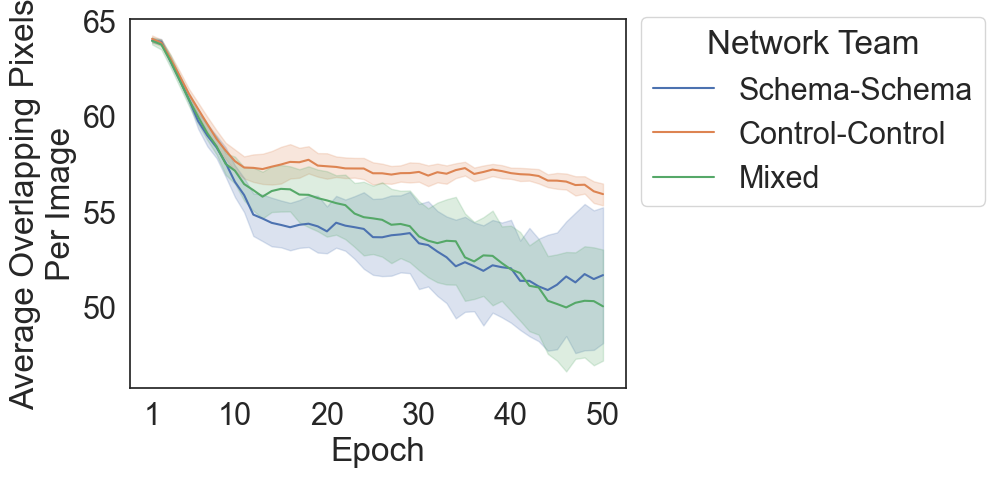

In [ ]:
df_list=[]

for kind in list(c.columns[1:]):

    lit_list = []

    for idx,g in c.iterrows():

        lit = ast.literal_eval(g[kind])
        lit_list.append([lit])

    df = pd.DataFrame(np.array(lit_list)[:,0,:]).T
    df['Epoch']=range(1,51)
    df_melted = df.melt(id_vars='Epoch', var_name='Subject', value_name='Overlap')
    df_melted['Network Team']=kind


    df_list.append(df_melted)

full_df = pd.concat(df_list)
full_df.loc[full_df['Network Team']=='Schema','Network Team']='Schema-Schema'
full_df.loc[full_df['Network Team']=='Control','Network Team']='Control-Control'

ax = sb.lineplot(data=full_df, x='Epoch', y='Overlap', hue='Network Team')
sb.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.045))

plt.xticks([1, 10, 20, 30, 40, 50])
plt.ylabel('Average Overlapping Pixels\nPer Image')